In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import method_reuse

In [2]:
# https://blog.csdn.net/wangrongrongwq/article/details/119697504
import proj1

importing Jupyter notebook from proj1.ipynb


In [3]:
#设置低通滤波器
def low_pass_filter(img, dftshift):
    (rows, cols) = img.shape                 # 解包
    crow, ccol = int(rows/2), int(cols/2)    # center
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30]=1 # 将中心部分置为1 （也就是低频部分）
    # 将掩膜图像和频谱图像乘积并返回
    return dftshift * mask

In [4]:
#设置高通滤波器
def high_pass_filter(img, dftshift):
    (rows, cols) = img.shape                 # 解包
    crow, ccol = int(rows/2), int(cols/2)    # center
    dftshift[crow-30:crow+30, ccol-30:ccol+30]=0 # 将中心部分置为0 （也就是低频部分）
    # 将掩膜图像和频谱图像乘积并返回
    return dftshift

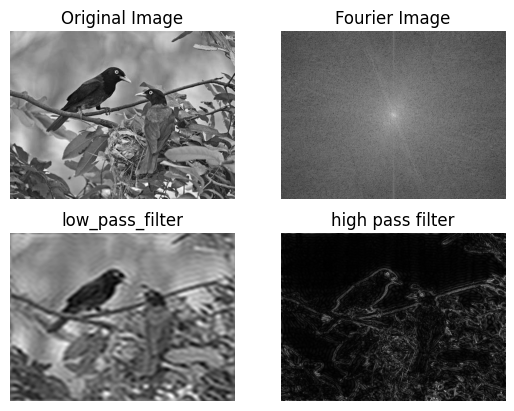

In [6]:
if __name__ == "__main__":
    img = cv2.imread('OIP-C.jpg', 0)
    (dftshift, res1) = proj1.fourier_transform(img)
    f1 = low_pass_filter(img, dftshift)
    (ishift, res2) = proj1.inverse_fourier_transform(f1)
    f2 = high_pass_filter(img, dftshift)
    (ishift, res3) = proj1.inverse_fourier_transform(f2)
    
    # output 
    plt.subplot(221), plt.imshow(img, 'gray'), plt.title('Original Image')
    plt.axis('off')
    plt.subplot(222), plt.imshow(res1, 'gray'), plt.title('Fourier Image')
    plt.axis('off')
    plt.subplot(223), plt.imshow(res2, 'gray'), plt.title('low_pass_filter')
    plt.axis('off')
    plt.subplot(224), plt.imshow(res3, 'gray'), plt.title('high pass filter')
    plt.axis('off')                                                
    plt.show()